In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.io import loadmat, savemat
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import curve_fit, minimize, least_squares
from scipy.integrate import trapz
from scipy.stats import norm, kurtosis
from matplotlib.ticker import ScalarFormatter
%matplotlib inline
#import mpld3
#mpld3.enable_notebook()

In [18]:
#axes.xaxis.set_tick_params(direction='in', which='both')
#axes.yaxis.set_tick_params(direction='in', which='both')



mpl.rcParams["xtick.direction"] = "in"
mpl.rcParams["ytick.direction"] = "in"
mpl.rcParams["lines.markeredgecolor"] = "k"
mpl.rcParams["lines.markeredgewidth"] = 0.1
mpl.rcParams["figure.dpi"] = 230
from matplotlib import rc
rc('font', family='serif')
rc('text', usetex=True)
rc('xtick', labelsize='large')
rc('ytick', labelsize='large')
def cm2inch(value):
    return value/2.54

In [19]:
raw_data = loadmat('fit_result_dur_27052020_n_r_fix_0p0513_wav_532_r_1p516_n_1.597.mat')["data"][:,0:3]
#raw_data = raw_data[45000:,:]
#raw_data = raw_data[1:,:]

r = 1.516*1e-6
n_part =  1.597
fps = 60
time = np.arange(0,np.shape(raw_data)[0])/fps


Text(0, 0.5, 'z [$\\mathrm{\\mu m}$]')

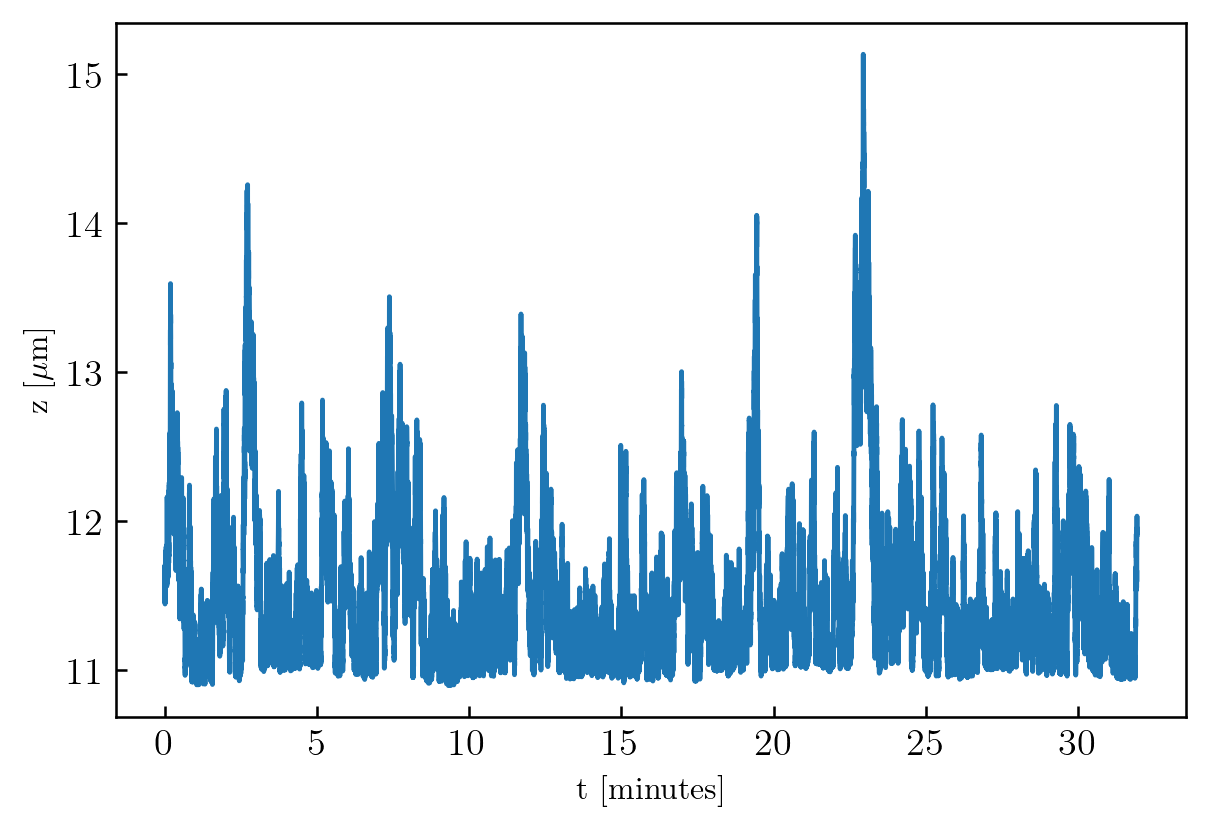

In [20]:
# We put everything in microns
raw_data_m = raw_data
raw_data_m[:,0:3] = raw_data_m[:,0:3] * 0.0513
plt.plot(time/60, raw_data_m[:,2])
x = raw_data_m[:,0]
y = raw_data_m[:,1]
z = raw_data_m[:,2]

plt.xlabel("t [minutes]")
plt.ylabel("z [$\mathrm{\mu m}$]")


In [21]:
z = z - min(z)

In [22]:
Dz = z[1:] - z[:-1]

In [23]:
dt = 1/60

In [24]:
d= (Dz[:-1] + Dz[1:])**2 / (4*dt) + (Dz[1:]*Dz[:-1])/(2*dt)

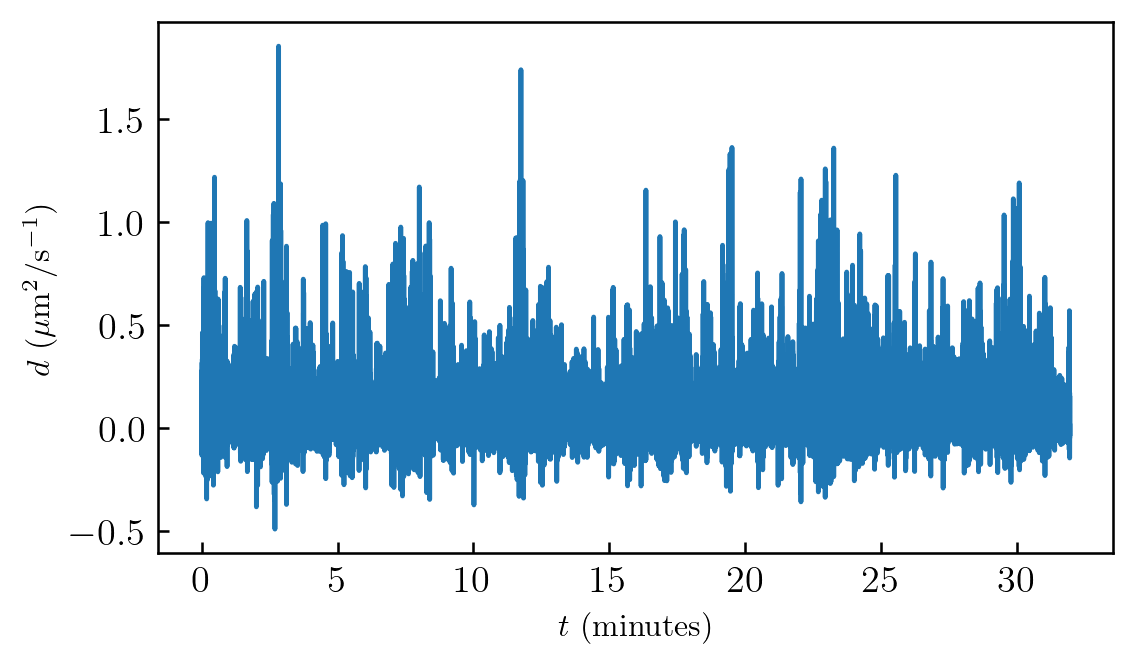

In [45]:
plt.figure(figsize=(3*1.68,3))
plt.plot(time[:-2]/60,d)
plt.xlabel("$t$ (minutes)")
plt.ylabel("$d$ ($\mathrm{\mu m^2/s^{-1}}$)")
plt.tight_layout()
plt.savefig("d.svg")

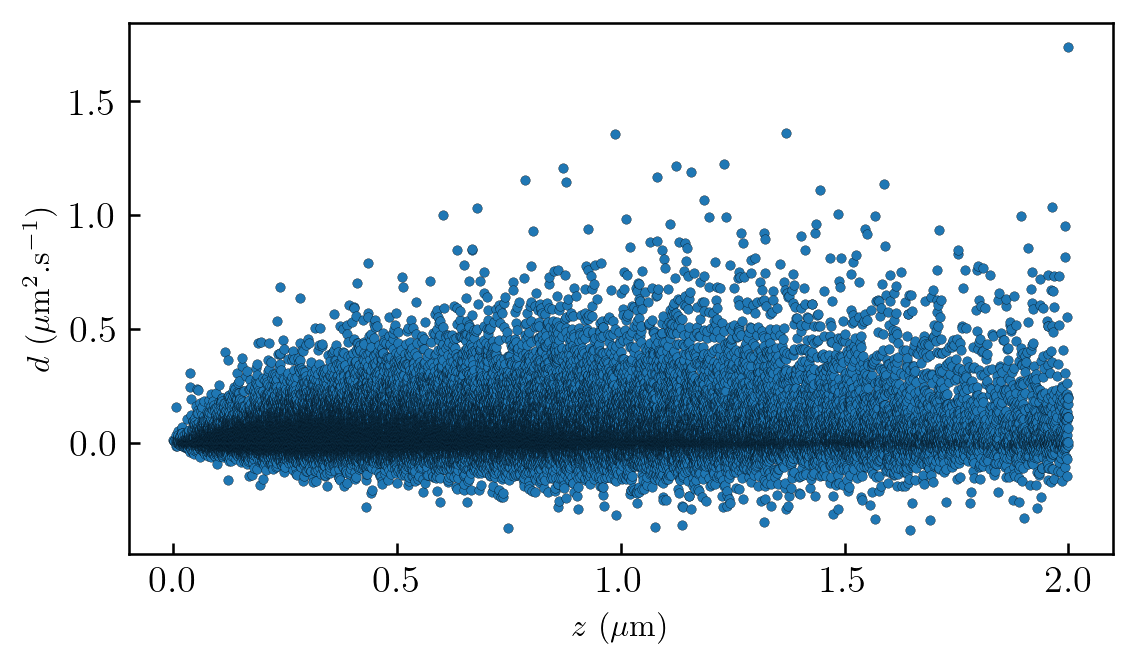

In [49]:
plt.figure(figsize=(3*1.68,3))
zs = np.sort(z[2:])
ds = d[np.argsort(z[2:])]
plt.plot(zs[zs<2], ds[zs<2], ".")
plt.ylabel("$d$ ($\mathrm{\mu m^2.s^{-1}}$)")
plt.xlabel("$z$ ($\mathrm{\mu m})$")
plt.tight_layout()
plt.savefig("ordered_d.png")

In [50]:
dataset = loadmat("data_graphs.mat")
for i in dataset.keys():
    try:
        dataset[i] = np.squeeze(dataset[i])
    except:
        continue

NameError: name 'fig' is not defined

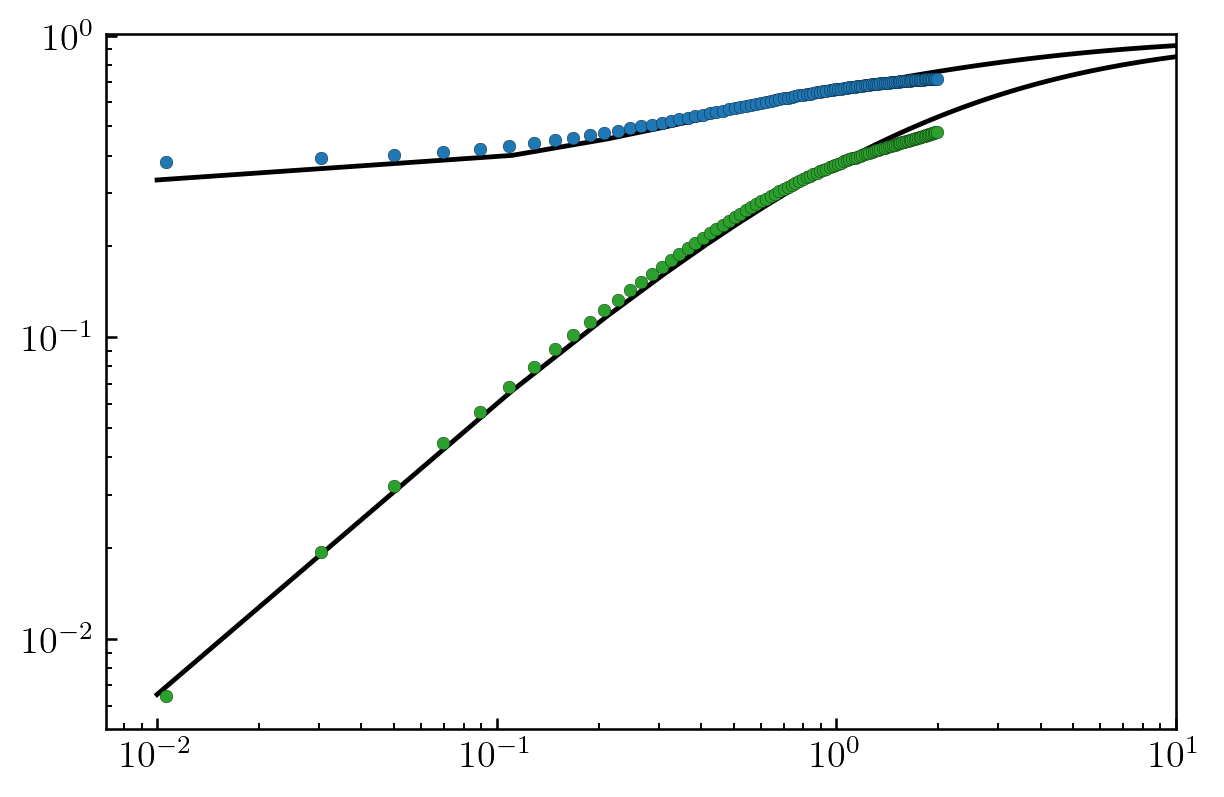

In [52]:

z_th = np.linspace(10e-9,10e-6,100)

plt.loglog(z_th*1e6, dataset["D_x_th"], color = "k")
plt.plot(dataset["z_D_yacine"]*1e6 - dataset["offset_diffusion"], dataset["z_D_x_yacine"] / dataset["Do"], marker = "o", linestyle = "",color = "tab:blue",label =  "$D_\\parallel$", markersize = 4)



#plt.errorbar(bins_center_pdf_z[:-1], Dz[:]/Do, yerr=err[:]/Do, linewidth = 3, marker = "o", linestyle = "",color = "tab:red",label =  "$D_ \\bot$")
plt.semilogx(z_th*1e6, dataset["D_z_th"],color = "k")
plt.plot(dataset["z_D_yacine"]*1e6 - dataset["offset_diffusion"], dataset["z_D_z_yacine"] / dataset["Do"], marker = "o", linestyle = "",color = "tab:green",label =  "$D_z$", markersize = 4)


ax = plt.gca()
ax.set_ylim([None,1.01])
ax.set_xlim([None,10])

locmaj = mpl.ticker.LogLocator(base=10.0, subs=(1.0, ), numticks=100)
ax.xaxis.set_major_locator(locmaj)
locmin = mpl.ticker.LogLocator(base=10.0, subs=np.arange(2, 10) * .1,
                                      numticks=100)
ax.xaxis.set_minor_locator(locmin)
ax.xaxis.set_minor_formatter(mpl.ticker.NullFormatter())


ymin, ymax = fig.gca().get_ylim()
xmin, xmax = fig.gca().get_xlim()

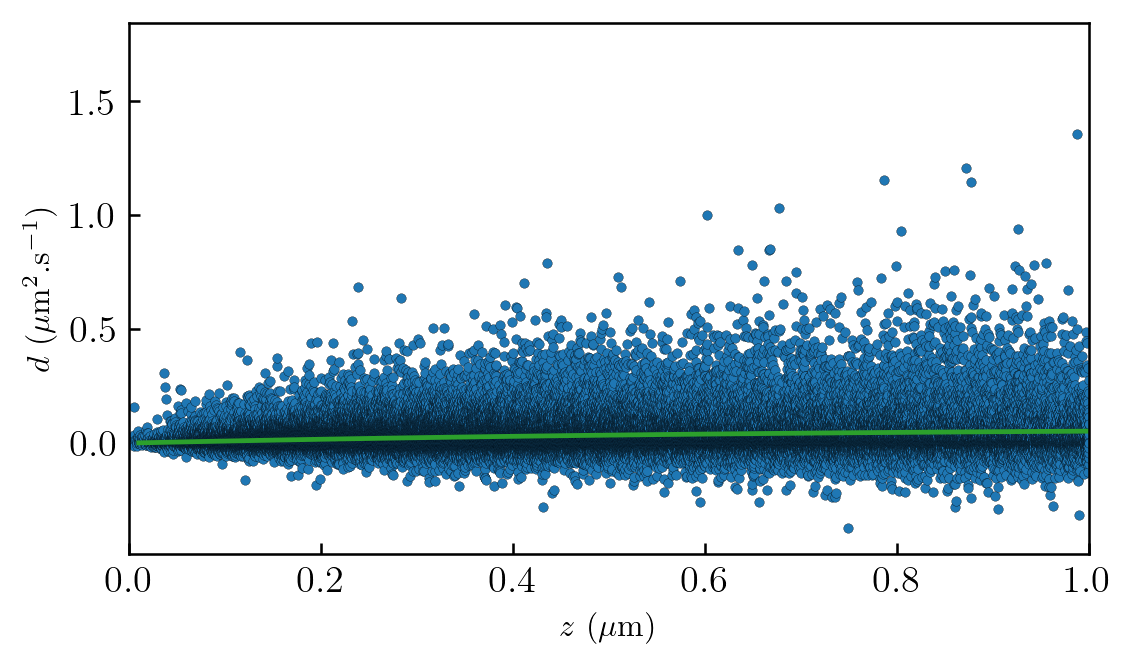

In [68]:
plt.figure(figsize=(3*1.68,3))
zs = np.sort(z[2:])
ds = d[np.argsort(z[2:])]
plt.plot(zs[zs<2], ds[zs<2], ".")
plt.ylabel("$d$ ($\mathrm{\mu m^2.s^{-1}}$)")
plt.xlabel("$z$ ($\mathrm{\mu m})$")
#plt.savefig("ordered_d.png")
plt.plot(dataset["z_D_yacine"]*1e6 - dataset["offset_diffusion"], dataset["z_D_z_yacine"] *1e12,color = "tab:green",label =  "$D_z$", markersize = 4)

#plt.plot(z_th*1e6, dataset["D_z_th"]*4e-21/(6*np.pi*0.001*1.5e-6)*1e12,color = "purple",)
plt.xlim((0,1))
plt.tight_layout()

plt.savefig("fitted_d.png")